**Activity 2.2**

- Yapa WSPYGC

- EG/2018/3513

In [2]:
import numpy as np #mathematical functions
import matplotlib.pyplot as plt #visulaizations
import seaborn as sns #visulaizations

In [3]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os

In [4]:
# build NNs with tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

In [7]:
# split the dataset into training and testing datasets along with the labels
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train),len(y_train),len(x_test),len(y_test)

(60000, 60000, 10000, 10000)

3


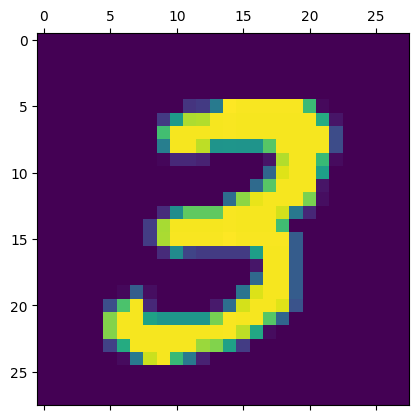

In [5]:
# visulaize one image in the training dataset and its label
print(y_train[7])
plt.matshow(x_train[7])

In [8]:
# Normalize the pixel values to be between 0 and 1 in images
x_train = x_train / 255
x_test = x_test / 255

In [27]:
# # flat/reshape dataset images (from 2D to 1D)

# x_train_flattened = x_train.reshape(len(x_train), 28*28)
# x_test_flattened =x_test.reshape(len(x_test), 28*28)

# print(x_train.shape)
# print(x_train_flattened.shape)

# print(x_test.shape)
# print(x_test_flattened.shape)

TASK 1 - Implementing a DNN

In [6]:
# define the model archiecture
model = keras.Sequential([
    #input shape is flattened using the in-built function (from 2D to 1D)
    keras.layers.Flatten(input_shape=(28, 28)), 
    #128 nodes in the hidden layer and ReLu activation
    keras.layers.Dense(128, activation='relu'), 
    #to reduce overfitting
    keras.layers.Dropout(0.2),
    # 10 classes (one for each digit) in the output layer
    keras.layers.Dense(10, activation='sigmoid') 
])

# configure the training
model.compile(optimizer='adam', #optimizer
              loss='sparse_categorical_crossentropy', #loss function
              metrics=['accuracy']) #display accuracy

model.summary() # summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# train the model
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2923 - accuracy: 0.9151
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1463 - accuracy: 0.9571
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1113 - accuracy: 0.9665
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0768 - accuracy: 0.9757
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9796
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9809
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9835
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0499 - accuracy: 0.9838
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.042

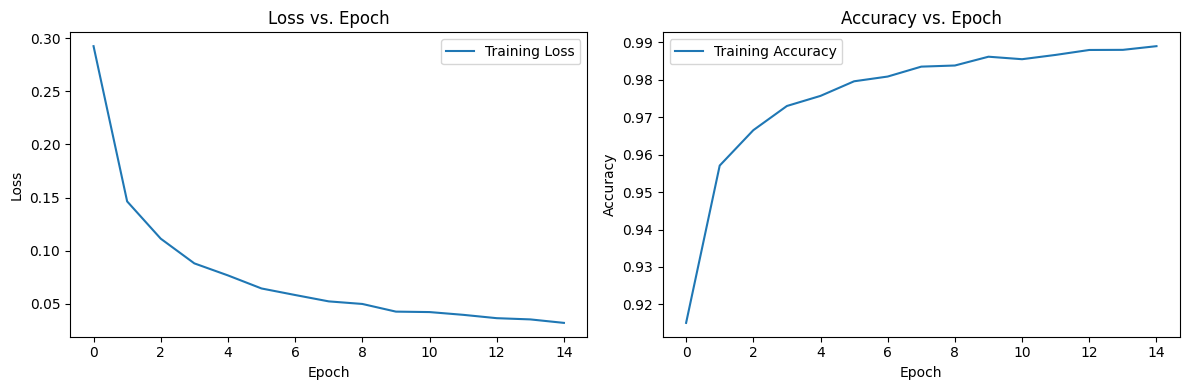

In [13]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# plot for training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# print the accuracy related to training and testing
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Training accuracy: {train_accuracy*100:.2f}%")
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0100 - accuracy: 0.9971
Training accuracy: 99.71%
313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9809
Test accuracy: 98.09%


313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Actual')

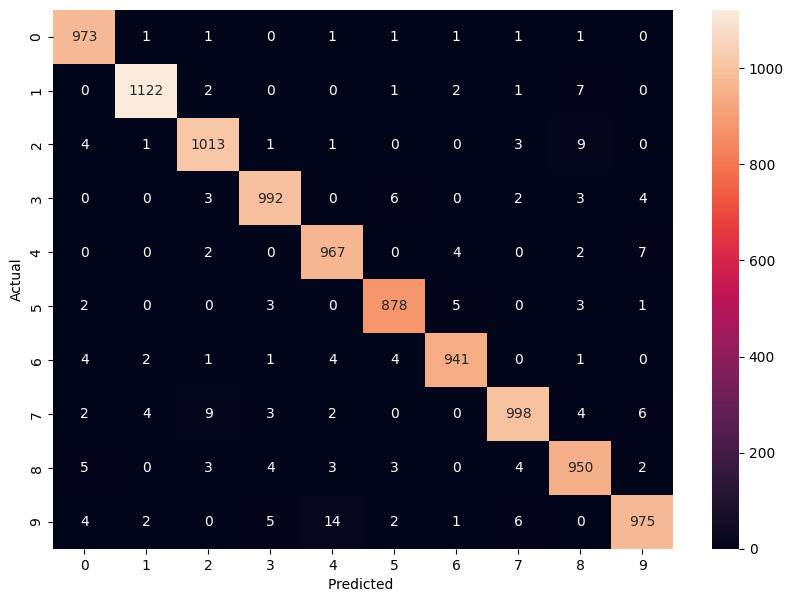

In [31]:
y_predicted = model.predict(x_test)# predict the test dataset with the trained model
y_predicted_labels = [np.argmax(i) for i in y_predicted]#get the class label
# calculate confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

# draw the confusion matirx using seaborn
sns.color_palette()
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted ')
plt.ylabel('Actual')

TASK 2 - Implementing a CNN

In [9]:
# define the model archiecture
model2 = keras.Sequential([
    #reshape
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    # convolution layer with 32 filters of 3by3 and ReLu activation
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # max pooling layer
    keras.layers.MaxPooling2D((2, 2)),
    # flat the convolutional layer
    keras.layers.Flatten(),
    # fully connected layer with 128 nodes and ReLu activation
    keras.layers.Dense(100, activation='relu'),
    # to reduce overfitting
    keras.layers.Dropout(0.2),
    # 10 classes (one for each digit) in the output layer
    keras.layers.Dense(10, activation='softmax')
])

# configure the training
model2.compile(optimizer='adam', #optimizer
              loss='sparse_categorical_crossentropy', #loss function
              metrics=['accuracy']) #display accuracy

model2.summary() # summary of the model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                      

In [10]:
# train the model
history2 = model2.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1897 - accuracy: 0.9428
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0732 - accuracy: 0.9775
Epoch 3/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0495 - accuracy: 0.9844
Epoch 4/15
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0406 - accuracy: 0.9871
Epoch 5/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 6/15
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0257 - accuracy: 0.9911
Epoch 7/15
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 8/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0168 - accuracy: 0.9939
Epoch 9/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0150 - accuracy: 0.9949
Epoch 10/15
1875/1875 [==============================] - 37s 20m

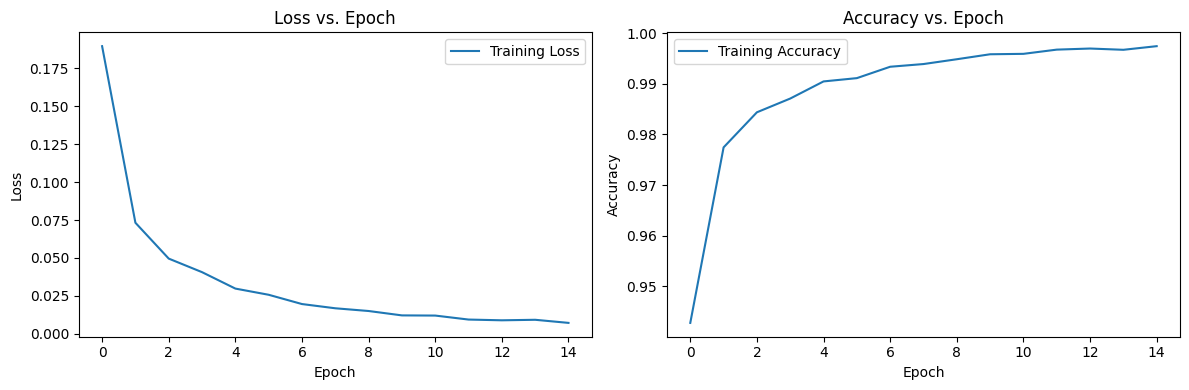

In [12]:
train_loss = history2.history['loss']
train_accuracy = history2.history['accuracy']

# plot for training loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# print the accuracy related to training and testing
train_loss, train_accuracy = model2.evaluate(x_train, y_train)
print(f"Training accuracy: {train_accuracy*100:.2f}%")
test_loss, test_accuracy = model2.evaluate(x_test,y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0051 - accuracy: 0.9984
Training accuracy: 99.84%
313/313 [==============================] - 2s 6ms/step - loss: 0.1435 - accuracy: 0.9825
Test accuracy: 98.25%


313/313 [==============================] - 2s 5ms/step


Text(95.72222222222221, 0.5, 'Actual')

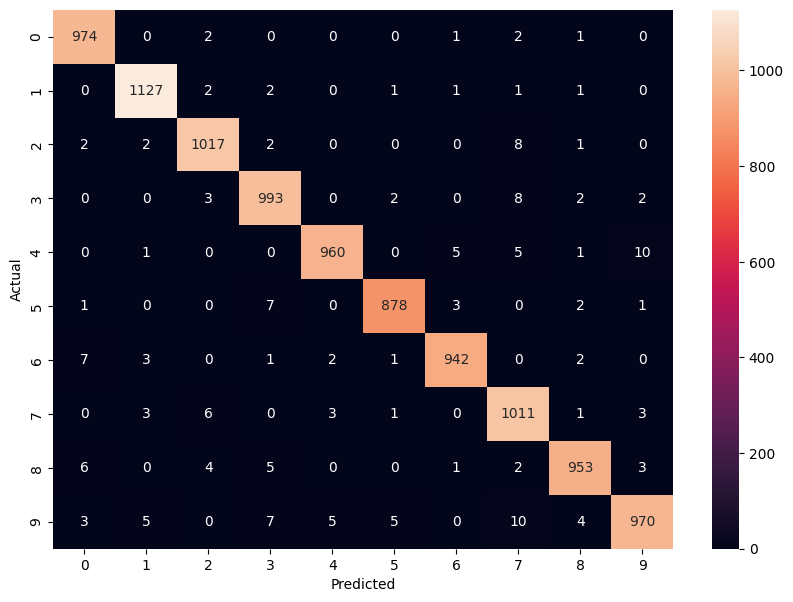

In [8]:
y_predicted = model2.predict(x_test) # predict the test dataset with the trained model
y_predicted_labels = [np.argmax(i) for i in y_predicted] #get the class label

# calculate confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

# draw the confusion matirx using seaborn
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

TASK 3 - For other images

model 01 - without CNN layers

In [137]:
def predict_digit(img):
    # Resize image to 28x28 pixels
    img = img.resize((28, 28))
    # Convert to grayscale
    img = img.convert('L')
    img = np.array(img)
    # Reshape to match the model's input shape and normalize
    img = img.reshape(1, 28, 28)
    img = img / 255.0
    # Predicting the class
    res = model.predict(img)[0]
    predicted_digit = np.argmax(res)
    return predicted_digit

1/1 [==============================] - 0s 35ms/step


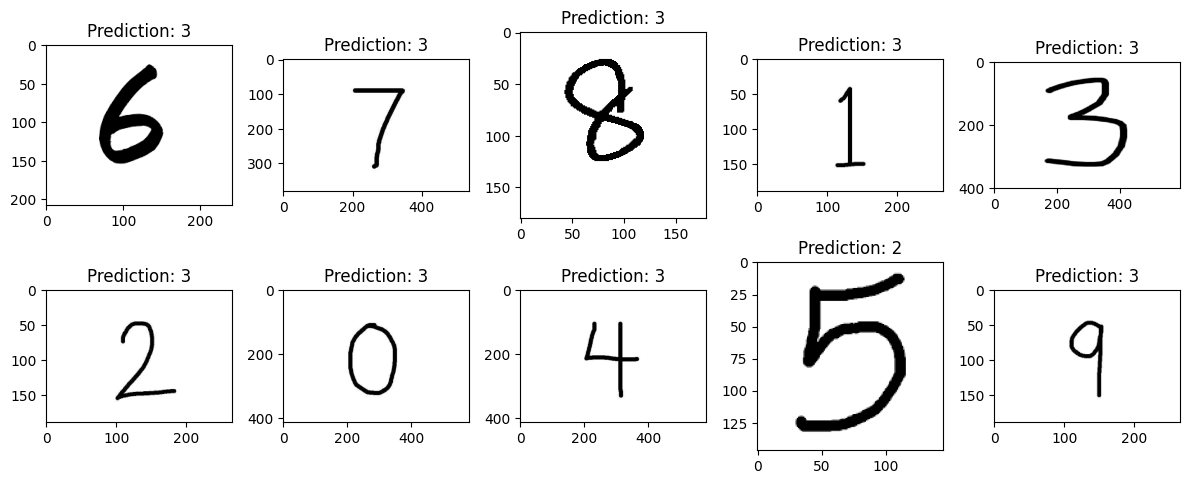

In [138]:
image_folder = "images"
image_files = os.listdir(image_folder)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# show the prediction for each image on a grid
for i, image_file in enumerate(image_files):
    if i < 10:  
        row = i // 5  
        col = i % 5   
        
        img = Image.open(os.path.join(image_folder, image_file))
        digit= predict_digit(img) #predict the digit/class
        
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"Prediction: {digit}", fontsize=12)

plt.tight_layout()
plt.show()


model 02 - with CNN layers

In [9]:
# preprocess the image to match the model 
def predict_digit_model2(img):
    p1_gray=ImageOps.grayscale(img)
    im_res1 = p1_gray.resize((28, 28))
    pic1=np.array(im_res1)
    pic1=255-pic1
    pic_res1=pic1.reshape(1,28,28)
    y_pred1=model2.predict(pic_res1)
    pred1=np.argmax(y_pred1)# predict the digit/class
    return pred1,im_res1

1/1 [==============================] - 0s 19ms/step


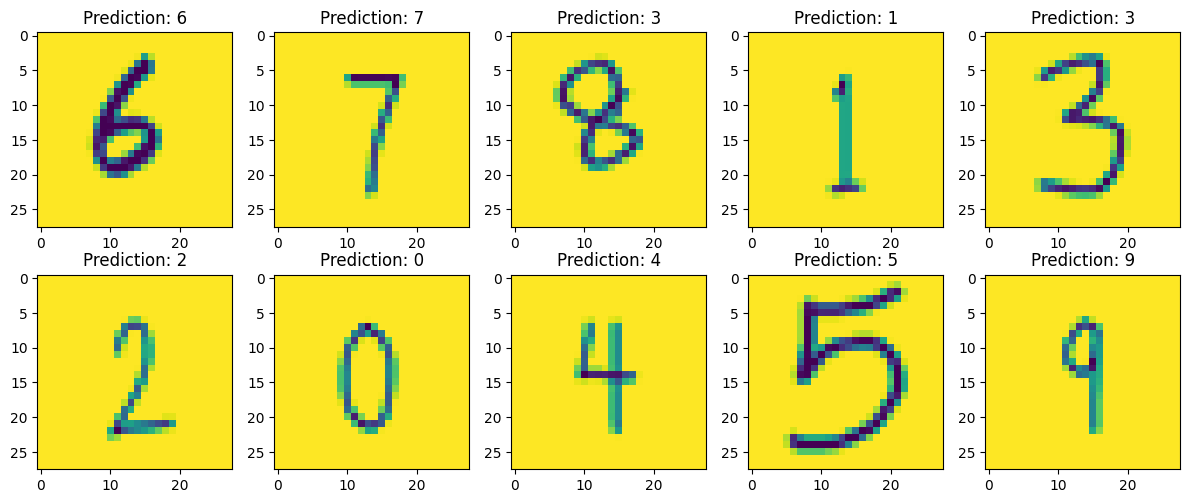

In [14]:
image_folder = "images"
image_files = os.listdir(image_folder)
fig, axes = plt.subplots(2, 5, figsize=(12, 5))

# show the prediction for each image on a grid
for i, image_file in enumerate(image_files):
    if i < 10:  
        row = i // 5  
        col = i % 5   
        
        img = Image.open(os.path.join(image_folder, image_file))
        digit, img= predict_digit_model2(img)
        
        axes[row, col].imshow(img)
        axes[row, col].set_title(f"Prediction: {digit}", fontsize=12)

plt.tight_layout()
plt.show()